In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

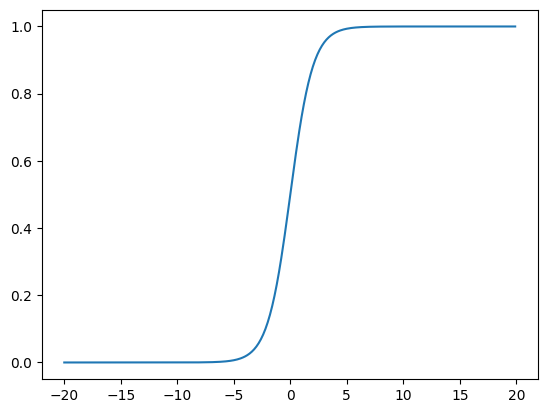

In [71]:
def sigmoid(z):
    g = 1 / (1 + np.exp(-z))
    return g

k = np.arange (-20, 20, .1)
l = sigmoid(k)

plt.plot(k, l)
plt.show()

In [72]:
df = pd.read_csv("C:\\Users\\lenovo\\Downloads\\train.csv.")

dfs = df.drop('Name', axis = 1)
dfs['Sex']= dfs['Sex'].apply(lambda x: 1 if x == 'male' else 0)

dfs.head()

,Survived,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,1,22.0,1,0,7.2500
1,1,1,0,38.0,1,0,71.2833
2,1,3,0,26.0,0,0,7.9250
3,1,1,0,35.0,1,0,53.1000
4,0,3,1,35.0,0,0,8.0500


In [73]:
x_train = np.array(dfs.drop('Survived', axis=1))
y_train = np.array(dfs['Survived'])
(p,q) = x_train.shape
print(x_train.shape)

def z_score_normalization(x):
    mean = np.mean(x, axis=0)
    std_dev = np.std(x, axis=0)
    normalized_x = (x - mean) / std_dev
    return normalized_x

x_train = z_score_normalization(x_train)

(577, 6)


In [74]:

def loss(y, yh):
    lossl = []  # Renamed the list variable to lossl
    
    for i in range(p):
        loss_val = -y[i] * np.log(yh[i]) - (1 - y[i]) * np.log(1 - yh[i])
        lossl.append(loss_val)
    return lossl

In [75]:
def cost(y, yh):
    m = len(y)
    cost = 1/m * np.sum(loss(y, yh))
    return cost

In [76]:
def grad (x, w, b):
    (p, q) = x.shape
    dw = np.zeros(q)
    db = 0
    cost=0
    ypr = []
    
    rs = np.sum(x_train, axis=1)
    for i in range (p):
        f=0
        for j in range (q):
            f = f + w * rs[j]
        f += b
  
        yh = sigmoid (f)
        ypr.append(yh)
        
    return ypr

In [77]:


def descent (x,y,b,lr,epochs, ypr):
    rec = []
    wl = []
    w = 0
    m = len(y)
    lamb = 10
    
    y1 = y[:]
    ypr1=ypr[:]
    lll = loss(y,ypr)
    for i in range(epochs):
        for j in range(p):
            jw = 1/m * lll[j] * np.log (1 - ypr1[j])
        jw += lamb / m * .5
        w = w - lr/m * np.sum (ypr - y) * x
        wl.append(w)
        rec.append(jw)
        
    return rec, wl

In [78]:
w= np.full(p, 0.5)
b=0
sur =[]

ypr = grad (x_train, w, 0)
a = loss(y_train, ypr)
epochs = 1000
b, wl = descent (x_train, y_train, 0, 0.001, epochs, ypr)



In [79]:
print(b)

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)

